In [11]:
import numpy as np
from BALinFit.bayes_linfit import bayesian_regression_mcmc

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('test.csv', names=['id', 'x', 'xerrl', 'xerru', 'y', 'yerrl', 'yerru'], header=0)
df = df = df[~df['x'].isna() & (df['x'] != -np.inf)]

In [13]:
df

,id,x,xerrl,xerru,y,yerrl,yerru
0,1,-1.284693,0.176102,0.216866,1.644104,0.193874,0.231135
2,3,-0.810841,0.202710,0.194648,1.707728,0.192076,0.213778
4,5,-0.321727,0.178127,0.184521,1.717245,0.099932,0.110270
5,6,-0.690510,0.281219,0.180548,1.786965,0.147592,0.672152
6,7,-0.170246,0.185447,0.223091,1.952145,0.255089,0.364265
7,8,-0.444281,0.176657,0.191723,1.708126,0.123847,0.139456
8,9,-1.458283,0.179785,0.179486,1.604787,0.102782,0.111156
9,10,-0.259773,0.176361,0.179733,1.719006,0.068193,0.082332
11,12,-0.893923,0.182282,0.206601,1.880820,0.203829,0.305401
12,13,-0.256131,0.201143,0.177858,1.864040,0.128695,0.152877


Running MCMC realizations: 100%|██████████| 100/100 [00:26<00:00,  3.84it/s]


{'slope_median': 0.12646539946857366,
 'slope_err_lower': 0.1242780620981232,
 'slope_err_upper': 0.12535392542766893,
 'intercept_median': 1.8555423107611135,
 'intercept_err_lower': 0.09120440738857938,
 'intercept_err_upper': 0.10425862668353947,
 'x_plot': array([-2.        , -1.97474747, -1.94949495, -1.92424242, -1.8989899 ,
        -1.87373737, -1.84848485, -1.82323232, -1.7979798 , -1.77272727,
        -1.74747475, -1.72222222, -1.6969697 , -1.67171717, -1.64646465,
        -1.62121212, -1.5959596 , -1.57070707, -1.54545455, -1.52020202,
        -1.49494949, -1.46969697, -1.44444444, -1.41919192, -1.39393939,
        -1.36868687, -1.34343434, -1.31818182, -1.29292929, -1.26767677,
        -1.24242424, -1.21717172, -1.19191919, -1.16666667, -1.14141414,
        -1.11616162, -1.09090909, -1.06565657, -1.04040404, -1.01515152,
        -0.98989899, -0.96464646, -0.93939394, -0.91414141, -0.88888889,
        -0.86363636, -0.83838384, -0.81313131, -0.78787879, -0.76262626,
        -0

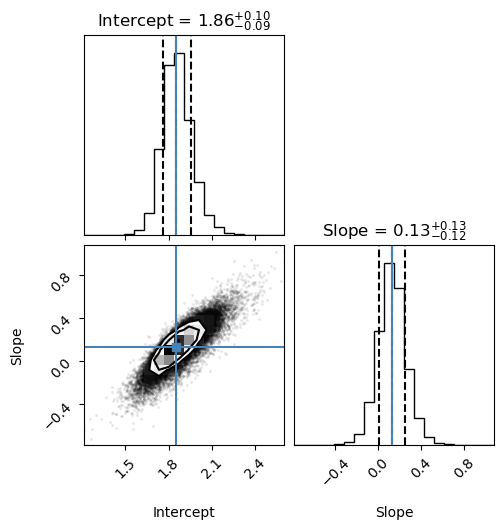

In [14]:
results = bayesian_regression_mcmc(
    x=df['x'].values, 
    y=df['y'].values, 
    y_err_lower=df['yerrl'].values/1.645, 
    y_err_upper=df['yerru'].values/1.645,
    x_err_lower=df['xerrl'].values/1.645, 
    x_err_upper=df['xerru'].values/1.645,
    x_min=-2, x_max=0.5,
    num_realizations=100
)
results

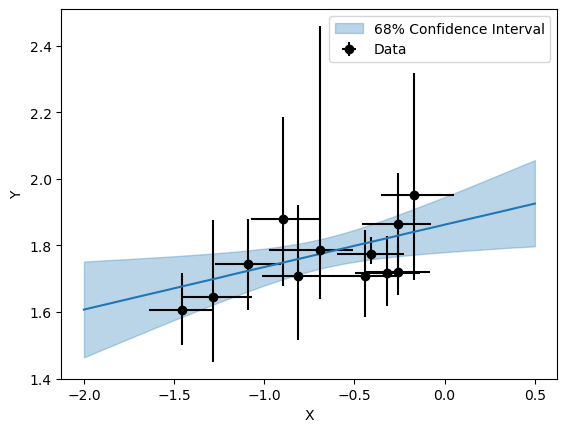

In [15]:
fig, ax = plt.subplots()
ax.errorbar(df['x'].values, df['y'].values, yerr=[df['yerrl'].values, df['yerru'].values], xerr=[df['xerrl'].values, df['xerru'].values], fmt='o', label='Data', color='black')
ax.plot(results['x_plot'], results['y_median'], color='tab:blue')#, label=f'Best Fit: y = {results['slope_median']:.2f} ± {results['slope_err_lower']:.2f}/{results['slope_err_upper']:.2f} x + {results['intercept_median']:.2f} ± {results['intercept_err_lower']:.2f}/{results['intercept_err_upper']:.2f}')
ax.fill_between(results['x_plot'], results['y_lower'], results['y_upper'], color='tab:blue', alpha=0.3, label='68% Confidence Interval')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()